In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
vg = pd.read_csv('../../data/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [4]:
vg.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
vg.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [3]:
null_cols = vg.isnull().mean()
null_cols = null_cols[null_cols > 0].sort_values() * 100
print(null_cols)
col_eliminar = list(null_cols[null_cols >= 40].index)
col_eliminar

Name                0.011962
Genre               0.011962
Publisher           0.322986
Year_of_Release     1.608948
Developer          39.613613
User_Score         40.098092
Rating             40.486871
Critic_Score       51.330821
Critic_Count       51.330821
User_Count         54.602548
dtype: float64


['User_Score', 'Rating', 'Critic_Score', 'Critic_Count', 'User_Count']

In [8]:
vg_no_ratings = vg[(vg['User_Score'].isnull()==True) & 
                (vg['Rating'].isnull()==True) & 
                (vg['Critic_Score'].isnull()==True) & 
                (vg['Critic_Count'].isnull()==True) & 
                (vg['User_Count'].isnull()==True)]
vg_no_ratings

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
vg_with_ratings = vg[(vg['User_Score'].isnull()==False) & 
                (vg['Rating'].isnull()==False) & 
                (vg['Critic_Score'].isnull()==False) & 
                (vg['Critic_Count'].isnull()==False) & 
                (vg['User_Count'].isnull()==False)]
vg_with_ratings

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [5]:
# cols = list(vg.columns)
# cols
cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Developer']
cols

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Developer']

In [6]:
vg = vg[cols]
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Developer        10096 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
nodev_nopub = vg[(vg['Developer'].isnull()==True) & (vg['Publisher'].isnull()==True)]
nodev_sipub = vg[(vg['Developer'].isnull()==True) & (vg['Publisher'].isnull()==False)]

In [13]:
nodev_sipub.sort_values('Year_of_Release').tail(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
13930,Sega Rally 2006,PS2,NaN,Racing,Unknown,0.00,0.00,0.04,0.0,0.04,NaN
14107,Half-Minute Hero 2,PSP,NaN,Role-Playing,Rising Star Games,0.00,0.00,0.04,0.0,0.04,NaN
14327,Beyond the Labyrinth,3DS,NaN,Role-Playing,Unknown,0.00,0.00,0.03,0.0,0.03,NaN
14451,Fullmetal Alchemist: Brotherhood,PSP,NaN,Action,Unknown,0.00,0.00,0.03,0.0,0.03,NaN
14599,Samurai Spirits: Tenkaichi Kenkakuden,PS2,NaN,Fighting,Unknown,0.00,0.00,0.03,0.0,0.03,NaN
14751,Tom and Jerry in War of the Whiskers,XB,NaN,Fighting,Unknown,0.02,0.01,0.00,0.0,0.03,NaN
14933,The King of Fighters: Maximum Impact - Maniax,XB,NaN,Fighting,Unknown,0.02,0.01,0.00,0.0,0.03,NaN
15081,Payout Poker & Casino,PSP,NaN,Misc,Unknown,0.02,0.00,0.00,0.0,0.02,NaN
15083,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.0,0.02,NaN
15121,Legacy of Ys: Books I & II,DS,NaN,Role-Playing,Unknown,0.02,0.00,0.00,0.0,0.02,NaN


In [14]:
vg[vg['Year_of_Release'].isnull()==True]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,EA Tiburon
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,EA Canada
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,Traveller's Tales
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,Oxygen Interactive
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,Midway
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,Saber Interactive
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN


In [15]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Developer        10096 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [16]:
vg.isnull().mean()*100

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Developer          39.613613
dtype: float64

In [17]:
t_1 = vg.groupby(['Genre','Year_of_Release'], as_index=False).agg({'Name':'count'})
t_1_95 = t_1[t_1['Year_of_Release'] < 1995]
t_1_2k = t_1[t_1['Year_of_Release'] >= 1995]

<AxesSubplot:title={'center':'Unidades vendidas al año por genero'}, xlabel='Género', ylabel='Ventas en millones de unidades'>

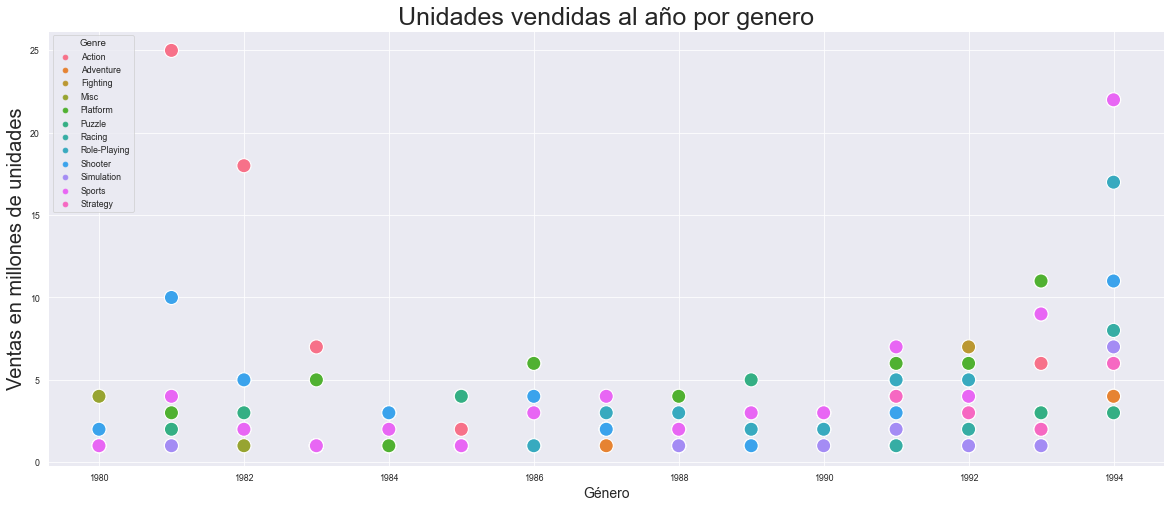

In [130]:
x_95 = t_1_95['Year_of_Release']
y_95 = t_1_95['Name']

plt.title('Unidades vendidas al año por genero', fontsize=25)
plt.xlabel('Año de publicación', fontsize=14)
plt.ylabel('Ventas en millones de unidades', fontsize=20)

sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (20, 18)})
sns.scatterplot(x=x_95,y=y_95,hue=t_1['Genre'], s=200)

In [19]:
t_1_95.isnull().sum()

Genre              0
Year_of_Release    0
Name               0
dtype: int64

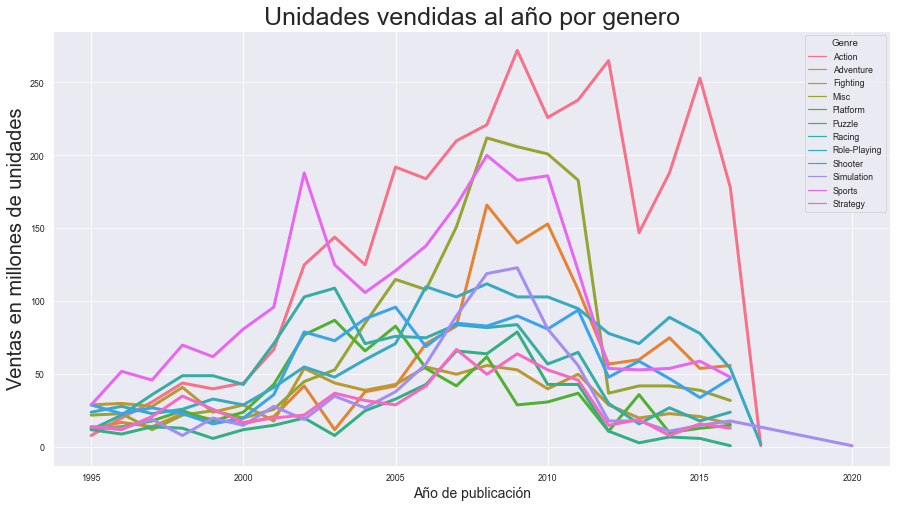

In [137]:
x = t_1_2k['Year_of_Release']
y = t_1_2k['Name']

plt.title('Unidades vendidas al año por genero', fontsize=25)
plt.xlabel('Año de publicación', fontsize=14)
plt.ylabel('Ventas en millones de unidades', fontsize=20)

sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (15, 8)})
sns.lineplot(x=x, y=y, hue=t_1['Genre'], linewidth=3);

In [21]:
# vg.groupby(['Genre','Year_of_Release'], as_index=False).agg({'Name':'count'})
generos_populares = vg[['Name','Year_of_Release', 'Platform','Genre']]

In [22]:
gen_data = pd.get_dummies(generos_populares['Genre'])
generos_populares = pd.concat([generos_populares,gen_data], axis=1)
generos_populares.head()

,Name,Year_of_Release,Platform,Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,2006.0,Wii,Sports,0,0,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,1985.0,NES,Platform,0,0,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,2008.0,Wii,Racing,0,0,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,2009.0,Wii,Sports,0,0,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,1996.0,GB,Role-Playing,0,0,0,0,0,0,0,1,0,0,0,0


In [23]:
# list(generos_populares.columns)
generos_populares[['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']].sum().sort_values(ascending=False)

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
dtype: int64

## Cantidad de ventas por plataforma

In [24]:
vg.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Developer'],
      dtype='object')

In [25]:
vg[['Year_of_Release','Platform']].sort_values('Year_of_Release')

,Year_of_Release,Platform
262,1980.0,2600
5360,1980.0,2600
546,1980.0,2600
2650,1980.0,2600
4019,1980.0,2600
...,...,...
16376,NaN,PSP
16409,NaN,GC
16452,NaN,PC
16462,NaN,PS3


In [26]:
import re

In [27]:
vg[(vg['Year_of_Release'].isnull()==True) & (vg['Name'].str.isalpha()==False)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,EA Tiburon
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,EA Canada
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,Traveller's Tales
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16351,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,Oxygen Interactive
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,Midway
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN


In [28]:
string = 'holis como-estas'
string.replace(' ','').isalpha()

False

In [29]:
# Encontrando años en nombres
# vg.loc[:,'Name'].str.isalpha()==True  870
# 1979, 1977, 2009, 1982, 2011, 1978, 2010, 1980, 2005,
# 2010, 2009, 2009, 2010, 2011, 2003, 2008, 2008, 2008,
# drop, drop, 2009, 2009, 2012
vg[(vg['Name'].str.isalpha()==True) & vg['Year_of_Release'].isnull()==True]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
1506,Adventure,2600,NaN,Adventure,Atari,1.21,0.08,0.00,0.01,1.30,NaN
1585,Combat,2600,NaN,Action,Atari,1.17,0.07,0.00,0.01,1.25,NaN
3997,Wet,X360,NaN,Shooter,Bethesda Softworks,0.23,0.21,0.01,0.05,0.50,Artificial Mind and Movement
4132,Karate,2600,NaN,Fighting,Ultravision,0.44,0.03,0.00,0.00,0.47,NaN
4648,TERA,PC,NaN,Role-Playing,Unknown,0.25,0.12,0.00,0.05,0.42,Bluehole Studio
5041,Hangman,2600,NaN,Puzzle,Atari,0.35,0.02,0.00,0.00,0.38,NaN
5624,Singularity,X360,NaN,Shooter,Unknown,0.24,0.05,0.00,0.02,0.32,Raven Software
5642,Dragster,2600,NaN,Racing,Activision,0.30,0.02,0.00,0.00,0.32,NaN
6343,Gun,X360,NaN,Shooter,Activision,0.24,0.01,0.00,0.02,0.27,Neversoft Entertainment
6862,Singularity,PS3,NaN,Shooter,Unknown,0.17,0.04,0.01,0.03,0.24,Raven Software


In [30]:
vg[vg['Name']=='Swords']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
14254,Swords,Wii,NaN,Fighting,Unknown,0.03,0.0,0.0,0.0,0.03,Panic Button


In [31]:
vg.drop(vg[vg['Name']=='Swords'].index, inplace=True)

## Plataforma por año

<AxesSubplot:title={'center':'Unidades vendidas al año por plataforma'}, xlabel='Year_of_Release', ylabel='Global_Sales'>

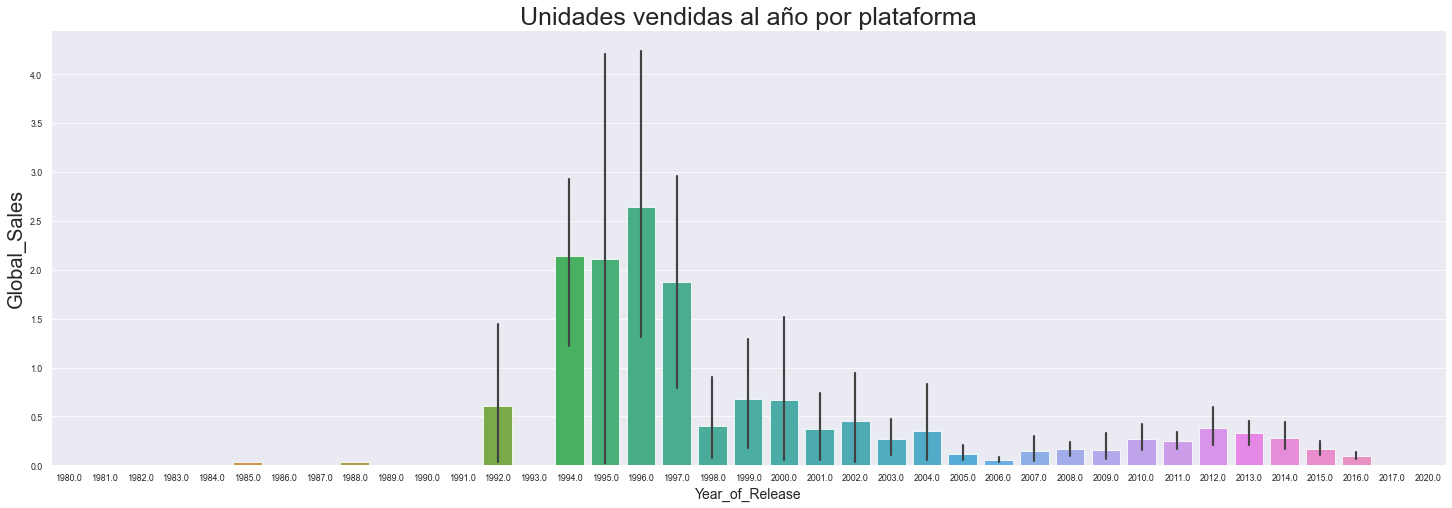

In [139]:
Q2 = vg[['Year_of_Release', 'Platform', 'Global_Sales']]
x = Q2['Year_of_Release']
y = vg[vg['Platform']=='PC']['Global_Sales'] #Q2['Global_Sales']

sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (25, 8)})
plt.title('Unidades vendidas al año por plataforma', fontsize=25)
plt.xlabel('Año de publicación', fontsize=14)
plt.ylabel('Ventas en millones de unidades', fontsize=20)

sns.barplot(x=x, y=y)#, hue=Q2['Platform'])

In [33]:
vg[vg['Platform']=='PC']['Global_Sales']

85       8.01
138      6.29
192      5.14
195      5.12
218      4.84
         ... 
16694    0.01
16696    0.01
16700    0.01
16706    0.01
16709    0.01
Name: Global_Sales, Length: 974, dtype: float64

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>

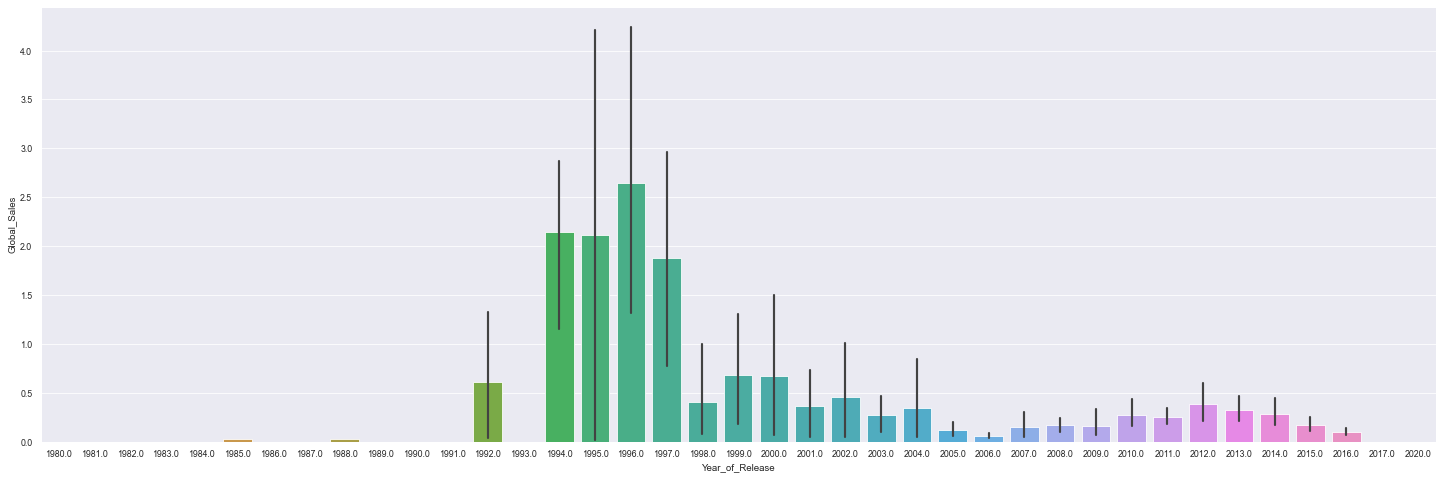

In [65]:
sns.barplot(x,y)

## Plataforma por Región

In [35]:
vg.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 0, 'Año'), Text(0, 0.5, 'Ventas en millones de unidades')]

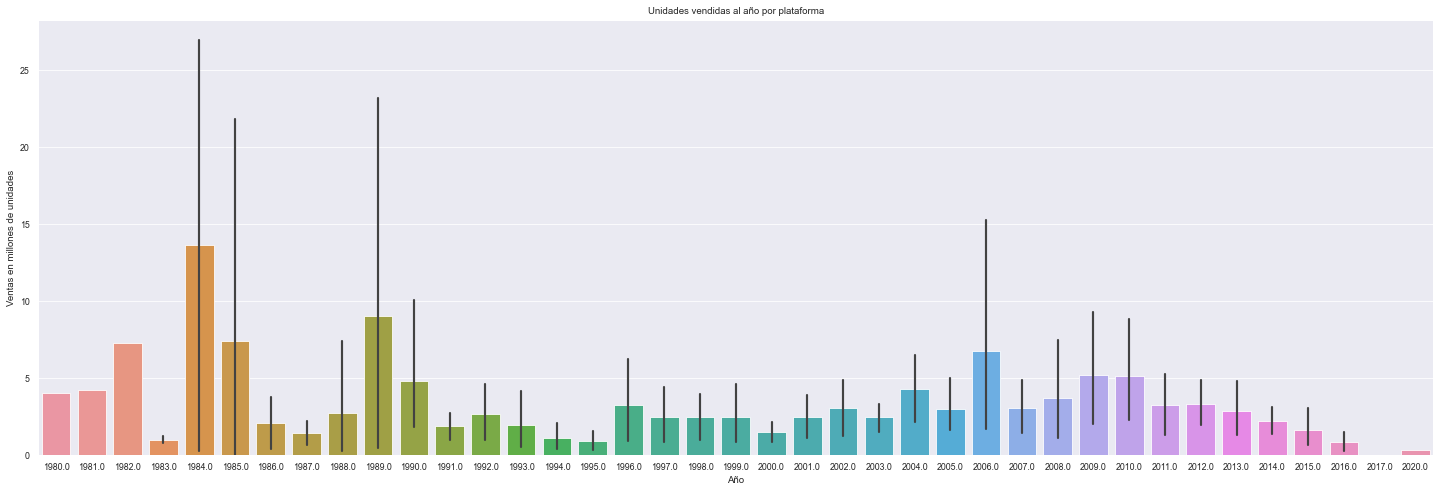

In [141]:
region_NA = vg.groupby(['Year_of_Release','Platform'], as_index=False).agg({'NA_Sales':'max'})
region_NA
x = region_NA['Year_of_Release']
y = region_NA['NA_Sales']

ax = sns.barplot(x,y)
ax.set_title('Unidades vendidas al año por plataforma')
ax.set(xlabel='Año', ylabel='Ventas en millones de unidades')

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


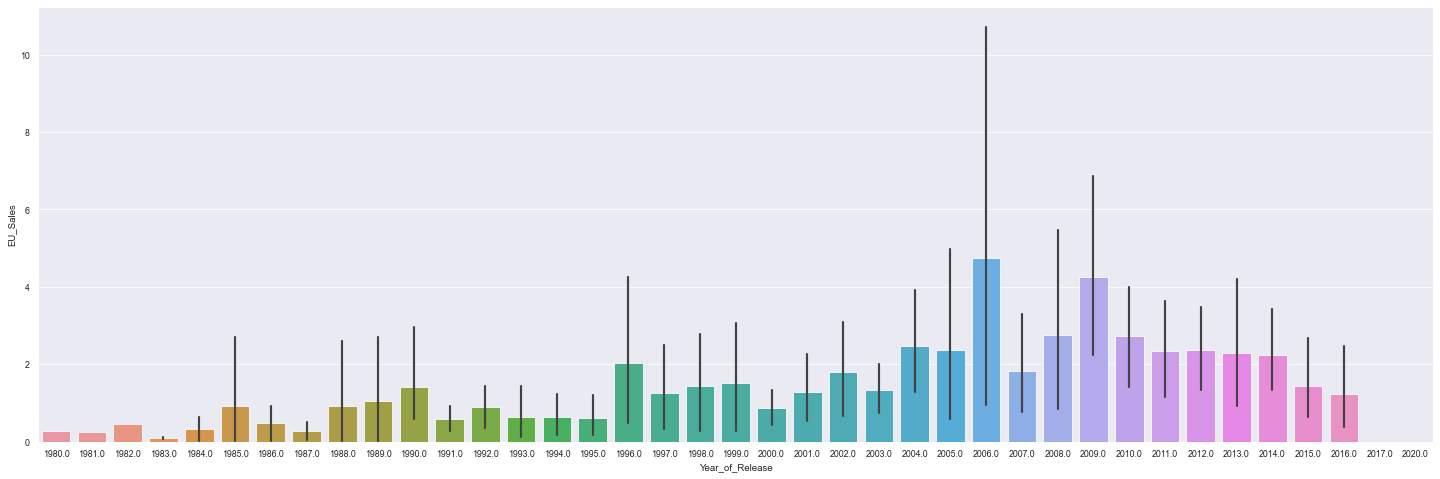

In [60]:
region_EU = vg.groupby(['Year_of_Release','Platform'], as_index=False).agg({'EU_Sales':'max'})
region_EU
x = region_EU['Year_of_Release']
y = region_EU['EU_Sales']

sns.barplot(x,y);

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


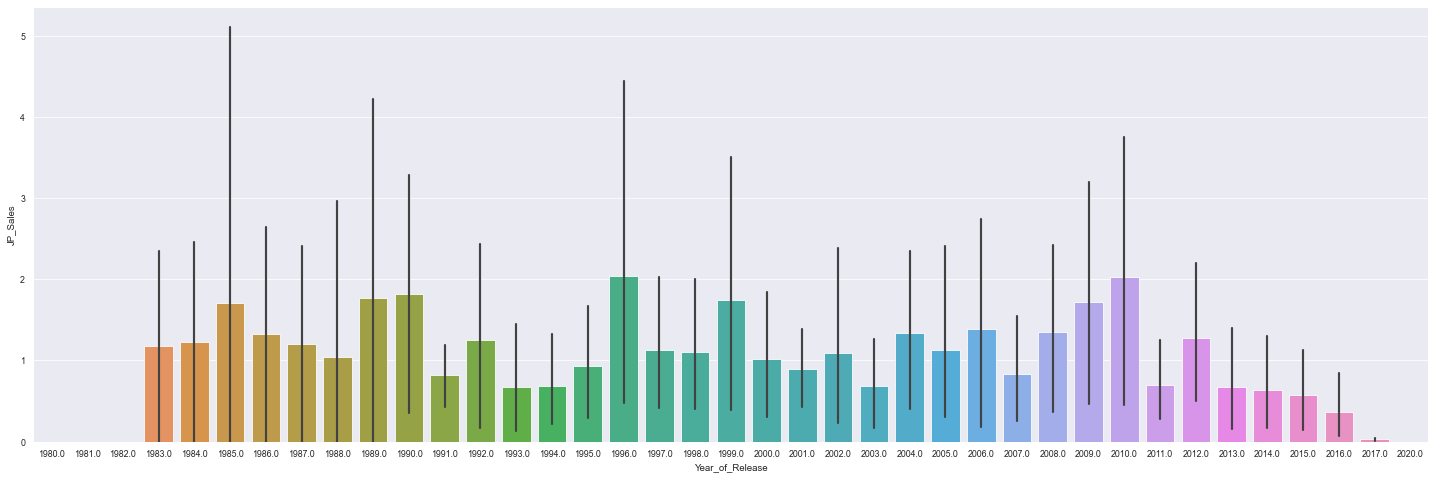

In [61]:
region_JP = vg.groupby(['Year_of_Release','Platform'], as_index=False).agg({'JP_Sales':'max'})
# region_JP
x = region_JP['Year_of_Release']
y = region_JP['JP_Sales']

sns.barplot(x,y);

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


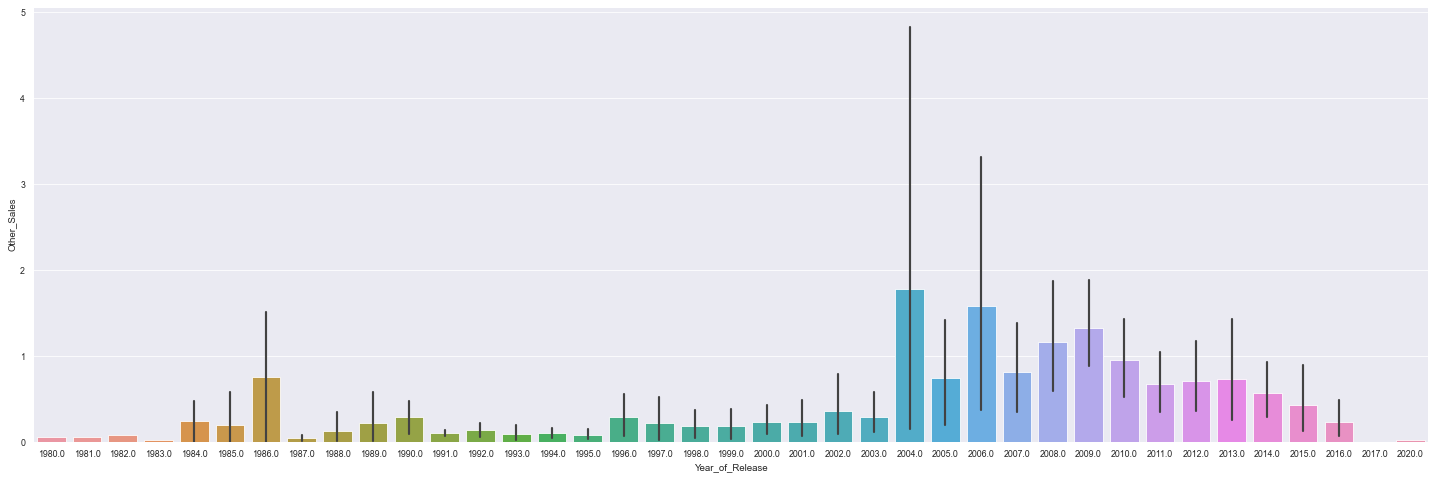

In [62]:
region = vg.groupby(['Year_of_Release','Platform'], as_index=False).agg({'Other_Sales':'max'})
region
x = region['Year_of_Release']
y = region['Other_Sales']

# plt.figure(figsize=(15, 5)) # (ancho, altura)
# plt.title('Género más vendido por Región', fontsize=25)
# plt.xlabel('Género', fontsize=14)
# plt.ylabel('Ventas en millones de unidades', fontsize=20)

sns.barplot(x,y);

## Mejor Género por región

In [7]:
gen_NA = vg.groupby('Genre',as_index=False).agg({'NA_Sales':'sum'})
gen_JP = vg.groupby('Genre',as_index=False).agg({'JP_Sales':'sum'})
gen_EU = vg.groupby('Genre',as_index=False).agg({'EU_Sales':'sum'})
gen_Global = vg.groupby('Genre',as_index=False).agg({'Global_Sales':'sum'})
gen_all = pd.concat([gen_NA,gen_JP['JP_Sales'],gen_EU['EU_Sales'],gen_Global['Global_Sales']],axis=1)
gen_all

,Genre,NA_Sales,JP_Sales,EU_Sales,Global_Sales
0,Action,879.01,161.44,519.13,1745.27
1,Adventure,105.26,52.30,63.54,237.69
2,Fighting,223.36,87.48,100.33,447.48
3,Misc,407.27,108.11,212.74,803.18
4,Platform,445.50,130.83,200.35,828.08
5,Puzzle,122.87,57.31,50.01,243.02
6,Racing,359.35,56.71,236.51,728.90
7,Role-Playing,330.81,355.46,188.71,934.40
8,Shooter,592.24,38.76,317.34,1052.94
9,Simulation,182.19,63.80,113.52,390.42


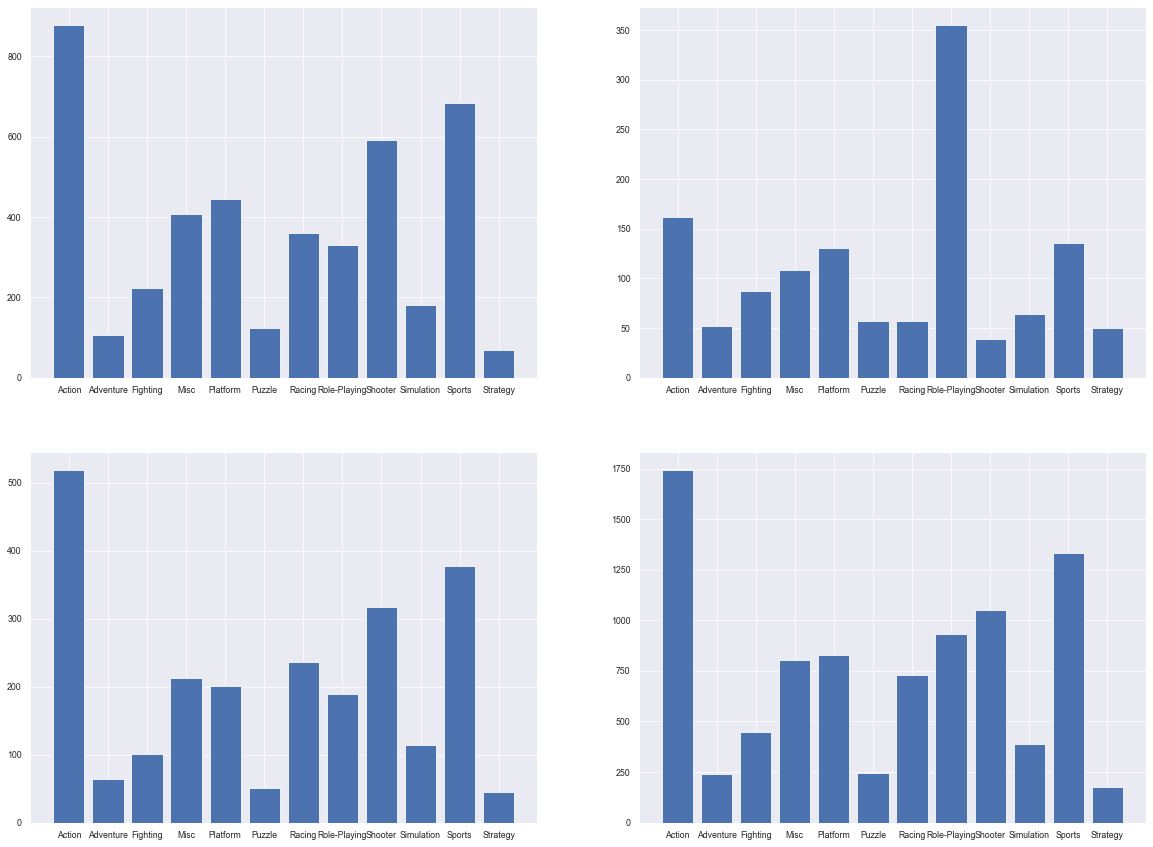

In [110]:
x = gen_all['Genre']
y1 = gen_all['NA_Sales']#,'JP_Sales','EU_Sales','Global_Sales']]
y2 = gen_all['JP_Sales']#,'JP_Sales','EU_Sales','Global_Sales']]
y3 = gen_all['EU_Sales']#,'JP_Sales','EU_Sales','Global_Sales']]
y4 = gen_all['Global_Sales']#,'JP_Sales','EU_Sales','Global_Sales']]

sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (20, 15)})
fig, ax = plt.subplots(2,2)
ax[0,0].bar(x,y1)
ax[0,1].bar(x,y2)
ax[1,0].bar(x,y3)
ax[1,1].bar(x,y4);

In [111]:
import plotly.express as px

In [19]:
gen_scatter = gen_all.melt(id_vars='Genre', var_name='Region', value_name='Sale')
gen_scatter

,Genre,Region,Sale
0,Action,NA_Sales,879.01
1,Adventure,NA_Sales,105.26
2,Fighting,NA_Sales,223.36
3,Misc,NA_Sales,407.27
4,Platform,NA_Sales,445.50
5,Puzzle,NA_Sales,122.87
6,Racing,NA_Sales,359.35
7,Role-Playing,NA_Sales,330.81
8,Shooter,NA_Sales,592.24
9,Simulation,NA_Sales,182.19


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Género más vendido por Región'}, xlabel='Género', ylabel='Ventas en millones de unidades'>

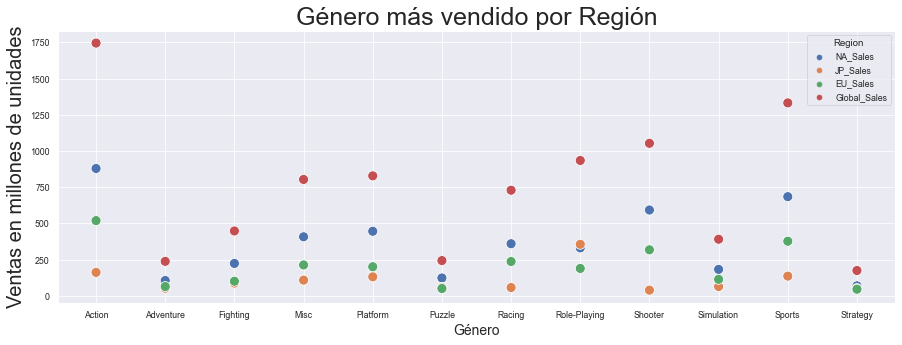

In [125]:
plt.figure(figsize=(15, 5)) # (ancho, altura)
plt.title('Género más vendido por Región', fontsize=25)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Ventas en millones de unidades', fontsize=20)

x = gen_scatter['Genre']
y = gen_scatter['Sale']

sns.scatterplot(x, y, hue=gen_scatter['Region'], s=100)

In [20]:
gen_scatter.to_csv('../../data/Video_Games_Generations.csv', index=False)

In [10]:
top_10 = vg[['Name', 
'Year_of_Release', 
'Platform', 
'Genre', 
'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']].sort_values('Global_Sales', ascending=False).head(10)
top_10.to_csv('../../data/VG_top10.csv')

In [11]:
top_10_NA = vg[['Name', 
'Year_of_Release', 
'Platform', 
'Genre', 
'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']].sort_values('NA_Sales', ascending=False).head(10)
top_10_NA.to_csv('../../data/VG_top10_NA.csv')

In [12]:
top_10_EU = vg[['Name', 
'Year_of_Release', 
'Platform', 
'Genre', 
'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']].sort_values('EU_Sales', ascending=False).head(10)
top_10_EU.to_csv('../../data/VG_top10_EU.csv')

In [13]:
top_10_JP = vg[['Name', 
'Year_of_Release', 
'Platform', 
'Genre', 
'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']].sort_values('JP_Sales', ascending=False).head(10)
top_10_JP.to_csv('../../data/VG_top10_JP.csv')

In [14]:
top_10_other = vg[['Name', 
'Year_of_Release', 
'Platform', 
'Genre', 
'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']].sort_values('Other_Sales', ascending=False).head(10)
top_10_other.to_csv('../../data/VG_top10_Other.csv')

In [24]:
vg.groupby('Platform').agg({'Global_Sales':'sum'}).sort_values('Global_Sales', ascending=False)

,Global_Sales
Platform,
PS2,1255.64
X360,971.63
PS3,939.43
Wii,908.13
DS,807.10
PS,730.68
GBA,318.50
PS4,314.23
PSP,294.30


In [29]:
n = 123
N = 0
for digit in str(n):
    # print(int(digit))
    N = N + int(digit)
N

6

In [35]:
vg.to_excel('../../data/VG_main.xlsx')

In [36]:
gen_scatter.to_excel('../../data/VG_genre.xlsx')

In [41]:
Nintendo = vg[(vg['Platform']=='GC') | 
(vg['Platform']=='N64') | (vg['Platform']=='NES') | 
(vg['Platform']=='SNES') | (vg['Platform']=='Wii') |
(vg['Platform']=='WiiU')]

In [42]:
Nintendo

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...
16690,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01,NaN
16697,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01,NaN
16698,Carmageddon 64,N64,1999.0,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01,NaN
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,Taito Corporation


In [51]:
N_Sales_Year = Nintendo.groupby('Year_of_Release', as_index=False).agg({'Global_Sales':'max'}).sort_values('Global_Sales', ascending=False)
N_Sales_Year

,Year_of_Release,Global_Sales
23,2006.0,82.53
2,1985.0,40.24
25,2008.0,35.52
26,2009.0,32.77
1,1984.0,28.31
24,2007.0,22.70
7,1990.0,20.61
5,1988.0,17.28
13,1996.0,11.89
10,1993.0,10.55


In [ ]:
Nintendo = vg[(vg['Platform']=='GC') | 
(vg['Platform']=='N64') | (vg['Platform']=='NES') | 
(vg['Platform']=='SNES') | (vg['Platform']=='Wii') |
(vg['Platform']=='WiiU')]

In [126]:
# Nintendo[(Nintendo['Global_Sales'] == N_Sales_Year['Global_Sales'])]

N_Sales_Year = Nintendo.groupby('Year_of_Release', as_index=False).agg({'Global_Sales':'max'}).sort_values('Global_Sales', ascending=False)
Nintendo_Top_names = []
Years = list(N_Sales_Year['Year_of_Release'])
Sales = list(N_Sales_Year['Global_Sales'])
for Y, S in zip(Years, Sales):
    # print(YS[0], YS[1])
    # Nintendo_Top_names.append(Nintendo[Nintendo['Year_of_Release']==YS[0]]['Name'])
    # print(Nintendo[Nintendo['Year_of_Release']==Y])
    Nintendo_Top_names.append(list(Nintendo[(Nintendo['Year_of_Release']==Y) 
    & (Nintendo['Global_Sales']==S)]['Name'])[0])

N_Sales_Year['Name']=Nintendo_Top_names
N_Sales_Year

,Year_of_Release,Global_Sales,Name
23,2006.0,82.53,Wii Sports
2,1985.0,40.24,Super Mario Bros.
25,2008.0,35.52,Mario Kart Wii
26,2009.0,32.77,Wii Sports Resort
1,1984.0,28.31,Duck Hunt
24,2007.0,22.70,Wii Fit
7,1990.0,20.61,Super Mario World
5,1988.0,17.28,Super Mario Bros. 3
13,1996.0,11.89,Super Mario 64
10,1993.0,10.55,Super Mario All-Stars


In [124]:
Sony = vg[(vg['Platform']=='PS') | 
(vg['Platform']=='PS2') | (vg['Platform']=='PS3') | 
(vg['Platform']=='PS4')]
Sony

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,Rockstar North
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,Rockstar North
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,Rockstar North
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,Polyphony Digital
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16687,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01,NaN
16693,Real Rode,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01,NaN
16695,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN
16713,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN


In [125]:
S_Sales_Year = Sony.groupby('Year_of_Release', as_index=False).agg({'Global_Sales':'max'}).sort_values('Global_Sales', ascending=False)
S_Sales_Year

,Year_of_Release,Global_Sales
19,2013.0,21.04
10,2004.0,20.81
8,2002.0,16.15
7,2001.0,14.98
21,2015.0,14.63
18,2012.0,13.79
17,2011.0,13.32
16,2010.0,12.63
20,2014.0,12.61
3,1997.0,10.95


In [127]:
Sony_Top_names = []
Years = list(S_Sales_Year['Year_of_Release'])
Sales = list(S_Sales_Year['Global_Sales'])
for Y, S in zip(Years, Sales):
    Sony_Top_names.append(list(Sony[(Sony['Year_of_Release']==Y) 
    & (Sony['Global_Sales']==S)]['Name'])[0])

In [128]:
S_Sales_Year['Name']=Sony_Top_names
S_Sales_Year

,Year_of_Release,Global_Sales,Name
19,2013.0,21.04,Grand Theft Auto V
10,2004.0,20.81,Grand Theft Auto: San Andreas
8,2002.0,16.15,Grand Theft Auto: Vice City
7,2001.0,14.98,Gran Turismo 3: A-Spec
21,2015.0,14.63,Call of Duty: Black Ops 3
18,2012.0,13.79,Call of Duty: Black Ops II
17,2011.0,13.32,Call of Duty: Modern Warfare 3
16,2010.0,12.63,Call of Duty: Black Ops
20,2014.0,12.61,Grand Theft Auto V
3,1997.0,10.95,Gran Turismo


In [129]:
Micrsoft = vg[(vg['Platform']=='PC') | 
(vg['Platform']=='X360') | (vg['Platform']=='XB') | 
(vg['Platform']=='XOne')]
Micrsoft

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,Good Science Studio
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,Rockstar North
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,"Infinity Ward, Sledgehammer Games"
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,Treyarch
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,Treyarch
...,...,...,...,...,...,...,...,...,...,...,...
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,Kojima Productions
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,Atomic Games
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,SimBin
16709,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.00,0.01,DTP Entertainment


In [130]:
M_Sales_Year = Micrsoft.groupby('Year_of_Release', as_index=False).agg({'Global_Sales':'max'}).sort_values('Global_Sales', ascending=False)
M_Sales_Year

,Year_of_Release,Global_Sales
19,2010.0,21.81
22,2013.0,16.27
20,2011.0,14.73
21,2012.0,13.67
18,2009.0,13.47
16,2007.0,12.12
17,2008.0,11.01
13,2004.0,8.49
24,2015.0,7.39
10,2001.0,6.43


In [132]:
Micrsoft_Top_names = []
Years = list(M_Sales_Year['Year_of_Release'])
Sales = list(M_Sales_Year['Global_Sales'])
for Y, S in zip(Years, Sales):
    Micrsoft_Top_names.append(list(Micrsoft[(Micrsoft['Year_of_Release']==Y) 
    & (Micrsoft['Global_Sales']==S)]['Name'])[0])

In [133]:
M_Sales_Year['Name']=Micrsoft_Top_names
M_Sales_Year

,Year_of_Release,Global_Sales,Name
19,2010.0,21.81,Kinect Adventures!
22,2013.0,16.27,Grand Theft Auto V
20,2011.0,14.73,Call of Duty: Modern Warfare 3
21,2012.0,13.67,Call of Duty: Black Ops II
18,2009.0,13.47,Call of Duty: Modern Warfare 2
16,2007.0,12.12,Halo 3
17,2008.0,11.01,Grand Theft Auto IV
13,2004.0,8.49,Halo 2
24,2015.0,7.39,Call of Duty: Black Ops 3
10,2001.0,6.43,Halo: Combat Evolved


In [134]:
M_Sales_Year.to_excel('../../data/VG_Microsoft.xlsx', index=False)

In [136]:
N_Sales_Year.to_excel('../../data/VG_Nintendo.xlsx', index=False)

In [137]:
S_Sales_Year.to_excel('../../data/VG_Sony.xlsx', index=False)

In [141]:
# x = M_Sales_Year['Year_of_Release']
# y = M_Sales_Year['Global_Sales']

# plt.figure(figsize=(15, 5)) # (ancho, altura)
# plt.title('Género más vendido por Región', fontsize=25)
# plt.xlabel('Género', fontsize=14)
# plt.ylabel('Ventas en millones de unidades', fontsize=20)
# sns.barplot(x,y)

In [142]:
M_Sales_Year

,Year_of_Release,Global_Sales,Name
19,2010.0,21.81,Kinect Adventures!
22,2013.0,16.27,Grand Theft Auto V
20,2011.0,14.73,Call of Duty: Modern Warfare 3
21,2012.0,13.67,Call of Duty: Black Ops II
18,2009.0,13.47,Call of Duty: Modern Warfare 2
16,2007.0,12.12,Halo 3
17,2008.0,11.01,Grand Theft Auto IV
13,2004.0,8.49,Halo 2
24,2015.0,7.39,Call of Duty: Black Ops 3
10,2001.0,6.43,Halo: Combat Evolved


In [147]:
Sega = vg[(vg['Platform']=='2600') | 
(vg['Platform']=='DC') | (vg['Platform']=='GEN') |
(vg['Platform']=='PCFX') | (vg['Platform']=='SCD') |  
(vg['Platform']=='NG') | (vg['Platform']=='SAT')]
# Sega

O_Sales_Year = Sega.groupby('Year_of_Release', as_index=False).agg({'Global_Sales':'max'}).sort_values('Global_Sales', ascending=False)
# O_Sales_Year

Sega_Top_names = []
Years = list(O_Sales_Year['Year_of_Release'])
Sales = list(O_Sales_Year['Global_Sales'])
for Y, S in zip(Years, Sales):
    Sega_Top_names.append(list(Sega[(Sega['Year_of_Release']==Y) 
    & (Sega['Global_Sales']==S)]['Name'])[0])

O_Sales_Year['Name']=Sega_Top_names
O_Sales_Year

,Year_of_Release,Global_Sales,Name
2,1982.0,7.81,Pac-Man
12,1992.0,6.03,Sonic the Hedgehog 2
1,1981.0,4.50,Pitfall!
11,1991.0,4.34,Sonic the Hedgehog
0,1980.0,4.31,Asteroids
10,1990.0,2.60,Streets of Rage
18,1998.0,2.42,Sonic Adventure
13,1993.0,2.39,NaN
15,1995.0,1.93,Virtua Fighter 2
14,1994.0,1.82,Sonic & Knuckles


In [148]:
O_Sales_Year.to_excel('../../data/VG_Sega.xlsx', index=False)

## TOP

In [155]:
vg.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [157]:
consolas = vg[
    (vg['Platform']!='GB') & (vg['Platform']!='DS') &
    (vg['Platform']!='GBA') & (vg['Platform']!='3DS') &
    (vg['Platform']!='PSP') & (vg['Platform']!='PSV') &
    (vg['Platform']!='GG') & (vg['Platform']!='3DO')
]
# consolas
top_year = consolas.groupby('Year_of_Release', as_index=False).agg({'Global_Sales':'max'})
top_year

,Year_of_Release,Global_Sales
0,1980.0,4.31
1,1981.0,4.50
2,1982.0,7.81
3,1983.0,3.20
4,1984.0,28.31
5,1985.0,40.24
6,1986.0,6.51
7,1987.0,4.38
8,1988.0,17.28
9,1989.0,4.17


In [158]:
Top_names = []
Years = list(top_year['Year_of_Release'])
Sales = list(top_year['Global_Sales'])
for Y, S in zip(Years, Sales):
    Top_names.append(list(vg[(vg['Year_of_Release']==Y) 
    & (vg['Global_Sales']==S)]['Name'])[0])

top_year['Name']=Top_names
top_year

,Year_of_Release,Global_Sales,Name
0,1980.0,4.31,Asteroids
1,1981.0,4.50,Pitfall!
2,1982.0,7.81,Pac-Man
3,1983.0,3.20,Baseball
4,1984.0,28.31,Duck Hunt
5,1985.0,40.24,Super Mario Bros.
6,1986.0,6.51,The Legend of Zelda
7,1987.0,4.38,Zelda II: The Adventure of Link
8,1988.0,17.28,Super Mario Bros. 3
9,1989.0,4.17,Teenage Mutant Ninja Turtles


In [153]:
top_year.to_excel('../../data/VG_top_year.xlsx', index=False)